In [1]:
import os

import numpy as np
import pandas as pd; pd.set_option('display.max_columns', None); pd.set_option('display.max_colwidth', 250)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Set the backend to render inline with no transparency
%matplotlib inline
plt.rcParams['savefig.transparent'] = False  # Ensure no transparency in saved figures
plt.rcParams['figure.facecolor'] = 'white'   # Set the figure background to white
plt.rcParams['axes.facecolor'] = 'white'     # Set the axes background to white

In [3]:
# set the seaborn plotting_context("talk", font_scale=1.5)
sns.set_context("talk", font_scale=1.1)

# Data

In [5]:
PATH = 'data'
FILE = 'data_fig1.csv'
df_combined = pd.read_csv(os.path.join(PATH, FILE))

# Figuras

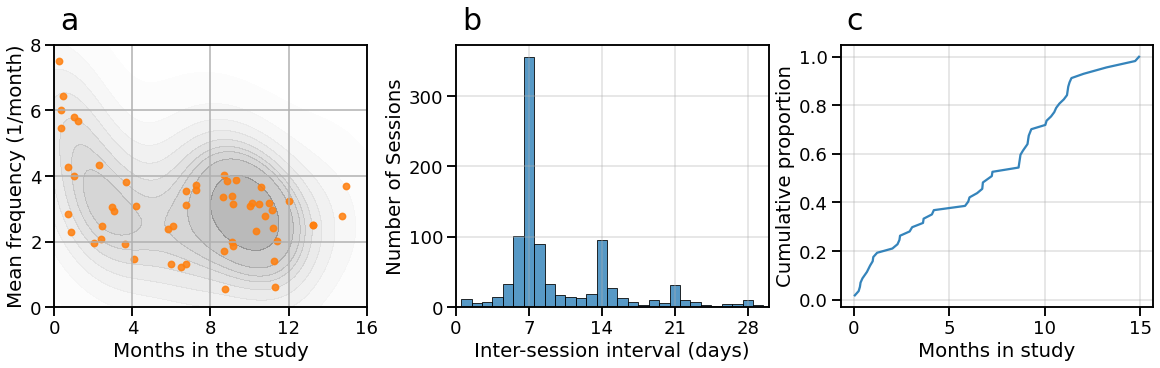

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5), layout='constrained')

#################################
# Panel A: KDE y scatterplot
ax = axs[0]
df_tmp = df_combined.drop_duplicates('subject_id')
x = df_tmp['timespan_months']
y = df_tmp['sessions_per_month']
sns.kdeplot(x=x, y=y, cmap="Greys", shade=True, bw_adjust=.8, alpha=.3, ax=ax)
ax.scatter(x,
           y, 
           color = sns.color_palette()[1],
           s = 40, 
           alpha=0.85,
           label = 'Patients')
ax.set_xlim([0, 16])
ax.set_ylim([0, 8])
ax.set_xticks(np.linspace(0, 16, 5, endpoint=True))
ax.set_yticks(np.linspace(0, 8, 5, endpoint=True))
ax.set_xlabel('Months in the study')
ax.set_ylabel('Mean frequency (1/month)')
ax.grid()


#################################
# Panel B: Histograma de intervalos
ax = axs[1]
sns.histplot(
    df_combined.query('timespan_months > 0')['days_diff'],
    bins=np.arange(0, 31, 1) + 0.5,
    color=sns.color_palette()[0],
    ax=ax
)
ax.set_xlabel('Inter-session interval (days)')
ax.set_ylabel('Number of Sessions')
ax.set_xticks(np.arange(0, 31, 7))
ax.grid(True, alpha=0.4)
ax.set_xlim([0, 30])

#################################
# Panel C: Proporción acumulativa
ax = axs[2]
df_cum = df_combined.drop_duplicates(subset=['subject_id']).sort_values(by='timespan_months')
df_cum['proportion'] = (df_cum['timespan_months'].rank(method='average') / len(df_cum))
sns.lineplot(
    x=df_cum['timespan_months'],
    y=df_cum['proportion'],
    color=sns.color_palette()[0],
    alpha=0.9,
    ax=ax
)
ax.set_xlabel('Months in study')
ax.set_ylabel('Cumulative proportion')
ax.grid(True, alpha=0.4)

# Agregar letras de panel dinámicamente
for ax, letter in zip(axs, 'abc'):
    ax.text(0.02, 1.09, letter, fontsize=30, va='center', ha='left', transform=ax.transAxes)

plt.show()
